In [1]:
import numpy as np
import matplotlib.pyplot as plt

(array([ 1.,  4.,  6., 25., 34., 46., 40., 30.,  8.,  6.]),
 array([-2.69380027, -2.39175257, -2.08970488, -1.78765719, -1.4856095 ,
        -1.18356181, -0.88151412, -0.57946643, -0.27741874,  0.02462895,
         0.32667664]),
 <BarContainer object of 10 artists>)

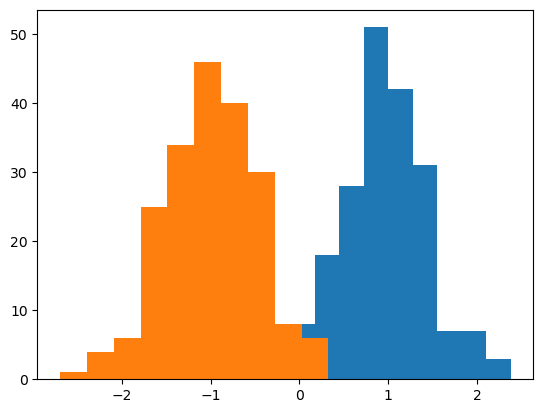

In [13]:
# generate dataset with two classes (labeled as 0 and 1)

cls1 = np.column_stack((np.random.normal(loc = [-1, -1], scale=[.5, .5], size=(200, 2)), np.ones(200)))
cls2 = np.column_stack((np.random.normal(loc = [1, 1], scale=[.5, .5], size=(200, 2)), np.zeros(200)))

data_set = np.concatenate((cls1, cls2))
np.random.shuffle(data_set)

features = data_set[:, :-1][:, 0]
labels = data_set[:, -1]

plt.hist(features[labels == 0])
plt.hist(features[labels == 1])

#plt.scatter(features[labels == 0][:, 0], features[labels == 0][:, 1])
#plt.scatter(features[labels == 1][:, 0], features[labels == 1][:, 1])

In [41]:
# activate function
def relu(xs):
    xs[xs < 0] = 0
    return xs

def sigmoid(xs):
    return 1 / (1 + np.exp(-xs))

# NN forward
def nn(xs, params):
    return sigmoid(relu(relu(xs @ params[0]) @ params[1]) @ params[2] + params[3]).flatten()

# loss function
def cross_entropy(ys, ys_pred):
    return -1/(ys.shape[0]) * np.sum(ys * np.log(ys_pred) + (1- ys) * np.log(1 - ys_pred))

# optimization target
def target(params):
    return cross_entropy(labels, nn(features, params))

(400, 10)